# Deep Learning Project

### Module installation for Google colab

In [1]:
!pip3 install --no-cache-dir -I pillow
!pip install --no-cache-dir -I pillow
!pip freeze

    100% |████████████████████████████████| 2.0MB 2.7MB/s 
    100% |████████████████████████████████| 2.0MB 2.2MB/s 
absl-py==0.6.1
altair==2.2.2
astor==0.7.1
atomicwrites==1.2.1
attrs==18.2.0
beautifulsoup4==4.6.3
bleach==3.0.2
cachetools==3.0.0
certifi==2018.11.29
chardet==3.0.4
crcmod==1.7
cycler==0.10.0
cymem==2.0.2
cytoolz==0.9.0.1
decorator==4.3.0
defusedxml==0.5.0
dill==0.2.8.2
entrypoints==0.2.3
future==0.16.0
gast==0.2.0
google-api-core==1.6.0
google-api-python-client==1.6.7
google-auth==1.4.2
google-auth-httplib2==0.0.3
google-auth-oauthlib==0.2.0
google-cloud-bigquery==1.1.0
google-cloud-core==0.28.1
google-cloud-language==1.0.2
google-cloud-storage==1.8.0
google-cloud-translate==1.3.1
google-colab==0.0.1a1
google-resumable-media==0.3.1
googleapis-common-protos==1.5.5
grpcio==1.15.0
h5py==2.8.0
httplib2==0.11.3
ideep4py==2.0.0.post3
idna==2.6
intel-openmp==2019.0
ipykernel==4.6.1
ipython==5.5.0
ipython-genutils==0.2.0
Jinja2==2.10
joblib==0.13.0
jsonschema==2.6.0
jupyter-cl

In [2]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
print(PIL.PILLOW_VERSION)

5.3.0


In [3]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip3 install torchtext
!pip3 install torchvision

tcmalloc: large alloc 1073750016 bytes == 0x57cbe000 @  0x7f41179902a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 71kB 2.7MB/s 


In [3]:
import os
import torch
import torchvision
from torchvision.datasets.utils import download_url
import zipfile

train_path = 'train'
dl_file = 'dl2018-image-proj.zip'
dl_url = 'https://users.aalto.fi/mvsjober/misc/'

zip_path = os.path.join(train_path, dl_file)
if not os.path.isfile(zip_path):
    download_url(dl_url + dl_file, root=train_path, filename=dl_file, md5=None)

with zipfile.ZipFile(zip_path) as zip_f:
    zip_f.extractall(train_path)
    
    #os.unlink(zip_path)

### Check data upload

In [0]:
# workaround 
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

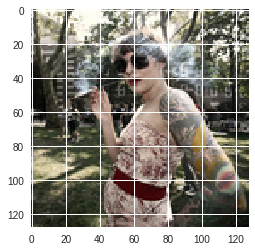

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('train/images/im1.jpg')

plt.imshow(img);

### Function to plot the image form a input tensor

In [0]:
def plot_image(tensor):
  
  if tensor.shape[0] == 3:

    x = tensor.permute(1,2,0).data.numpy()

    plt.imshow(x)
    
  elif tensor.shape[0] == 1:
    
    x = tensor.permute(1,2,0).squeeze(2).data.numpy()

    plt.imshow(x, cmap='gray')

In [0]:
def show_dataset(dataset, n=6):
    imgs = torch.stack([dataset[i][0] for _ in range(n)
                       for i in range(len(dataset))])
    
    for img in imgs:
      plot_image(img)

### Function to create the csv for associate to the image the labels contain in the folder "annotation"

In [8]:
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np


file_col=listdir("train/images")
list1 = [int(x[2:len(x)-4]) for x in file_col]
list1.sort()
listfin=["train/images/im"+str(num)+".jpg" for num in list1]

file_col=pd.Series(listfin)

df=pd.DataFrame()
df["fileName"]=file_col

path = "train/annotations"

row = 0

file_dic = {}

for label, filename in enumerate(listdir(path)):
  tmp=np.zeros(file_col.shape[0])
  with open(path+"/"+filename, "r") as file:
    file_len = 0
    for line in file:
      line = line.replace("\n", "")
      line = int(line)
      tmp[line-1] = 1
      file_len = file_len + 1
  tmp=pd.Series(tmp)
  df[filename]=tmp
  file_dic[filename] = file_len

print(file_dic)




{'bird.txt': 360, 'baby.txt': 95, 'flower.txt': 761, 'clouds.txt': 1095, 'sea.txt': 173, 'male.txt': 2979, 'female.txt': 3227, 'river.txt': 120, 'people.txt': 6403, 'car.txt': 319, 'portrait.txt': 3121, 'dog.txt': 448, 'tree.txt': 525, 'night.txt': 598}


In [9]:
df.head()

,fileName,bird.txt,baby.txt,flower.txt,clouds.txt,sea.txt,male.txt,female.txt,river.txt,people.txt,car.txt,portrait.txt,dog.txt,tree.txt,night.txt
0,train/images/im1.jpg,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,train/images/im2.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,train/images/im3.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,train/images/im4.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,train/images/im5.jpg,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df.loc[19998]

fileName        train/images/im19999.jpg
bird.txt                               0
baby.txt                               0
flower.txt                             0
clouds.txt                             0
sea.txt                                0
male.txt                               0
female.txt                             1
river.txt                              0
people.txt                             1
car.txt                                0
portrait.txt                           1
dog.txt                                0
tree.txt                               0
night.txt                              0
Name: 19998, dtype: object

### Given the csv that maps file and labels, create the pytorch data loader

In [0]:
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import operator

class ImageDataLoader(Dataset):
  def __init__(self,dataframe, transformations=None):
    
    # transformations
    self.to_tensor = transforms.ToTensor()
    self.to_grayscale = transforms.Grayscale()
    
    self.data_info = dataframe
    
    # First col is the path of the image
    self.image_arr = np.asarray(self.data_info.iloc[:,0])
    
    # Other cols are labels
    self.label_arr = np.asarray(self.data_info.iloc[:,range(1,self.data_info.shape[1])])
    
    # Len
    self.data_len = len(self.data_info.index)
    
    # for data augmentation
    self.transformations = transformations
    
   
  
  def __getitem__(self, index):
    
    # Get image name from the pandas df
    single_image_name = self.image_arr[index]
    
    # Open image
    img_as_img = Image.open(single_image_name).convert("RGB")
    
    # Transform to gray
    #img_as_img = self.to_grayscale(img_as_img)
    
    if self.transformations:
      img_as_img = self.transformations(img_as_img)
    
    # Transform image to tensor
    img_as_tensor = self.to_tensor(img_as_img)
      
    
    # if img_as_tensor.shape[0] == 1:
      # img_as_tensor

    # Get label(class) of the image based on the cropped pandas column
    single_image_label = self.label_arr[index]

    return (img_as_tensor, single_image_label)
  
  def __len__(self):
    return self.data_len
  
  def count_images(self):
    count = 0
    for i in self.image_arr:
      image= Image.open(i)
      img_as_tensor = self.to_tensor(image)
      # print(img_as_tensor.shape)
      if img_as_tensor.shape[0] == 1:
          count = count + 1
          print(i)
    print("gray scale:", count)
    print("coloured", len(self.image_arr)-count)
    
    

In [22]:
image_loader=ImageDataLoader(df)
image_loader.count_images()

train/images/im7.jpg
train/images/im11.jpg
train/images/im49.jpg
train/images/im89.jpg
train/images/im99.jpg
train/images/im105.jpg
train/images/im113.jpg
train/images/im129.jpg
train/images/im146.jpg
train/images/im150.jpg
train/images/im151.jpg
train/images/im182.jpg
train/images/im188.jpg
train/images/im200.jpg
train/images/im201.jpg
train/images/im219.jpg
train/images/im228.jpg
train/images/im232.jpg
train/images/im239.jpg
train/images/im243.jpg
train/images/im251.jpg
train/images/im284.jpg
train/images/im296.jpg
train/images/im297.jpg
train/images/im300.jpg
train/images/im325.jpg
train/images/im353.jpg
train/images/im392.jpg
train/images/im406.jpg
train/images/im422.jpg
train/images/im455.jpg
train/images/im464.jpg
train/images/im474.jpg
train/images/im477.jpg
train/images/im498.jpg
train/images/im507.jpg
train/images/im513.jpg
train/images/im516.jpg
train/images/im518.jpg
train/images/im530.jpg
train/images/im576.jpg
train/images/im593.jpg
train/images/im594.jpg
train/images/im59

KeyboardInterrupt: ignored

In [19]:
dataloader = torch.utils.data.DataLoader(image_loader, batch_size=4, shuffle=True, num_workers=4)

for (batch_idx,batch) in enumerate(dataloader):
  
  _input, target = batch # input is a 3d tensor, target is 1d
  print(_input.shape)
  print(target.shape)
  # bs, ncrops, c, h, w = _input.size()
  # result = model(_input.view(-1, c, h, w)) # fuse batch size and ncrops
  
  # print(result)
  # result_avg = result.view(bs, ncrops, -1).mean(1) # avg over crops

torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 128, 128])
torch.Size([4, 14])
torch.Size([4, 3, 12

Process Process-20:
Traceback (most recent call last):
Process Process-18:
Process Process-19:
Process Process-17:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 106, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 106, i

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-a6f6aef142b8>", line 3, in <module>
    for (batch_idx,batch) in enumerate(dataloader):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 330, in __next__
    idx, batch = self._get_batch()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 309, in _get_batch
    return self.data_queue.get()
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 337, in get
    return _ForkingPickler.loads(res)
  File "/usr/local/lib/python3.6/dist-packages/torch/multiprocessing/reductions.py", line 151, in rebuild_storage_fd
    fd = df.detach()
  File "/usr/lib/python3.6/multiprocessing/resource_sharer.py", line 57, in detach
    with _resource_sharer.get_connection(self._id) as conn:
  File "/usr/lib/python3.6/

KeyboardInterrupt: ignored

In [0]:
tfs = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=PIL.Image.BILINEAR),
])

image_loader = ImageDataLoader(df, tfs)

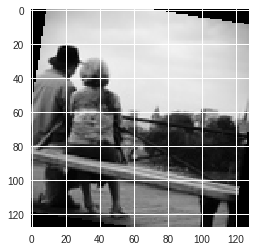

In [40]:
dataloader = torch.utils.data.DataLoader(image_loader, batch_size=32, shuffle=True, num_workers=4)

for (batch_idx,batch) in enumerate(dataloader):
  
  _input, target = batch # input is a 3d tensor, target is 1
  # plt.clf()
  plot_image(_input[0])
  if batch_idx == 4:
    break

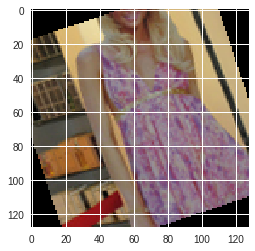

In [46]:
#to plot the immage
plot_image(image_loader.__getitem__(19998)[0])
# image_loader.__getitem__(19998)[0].shape

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.

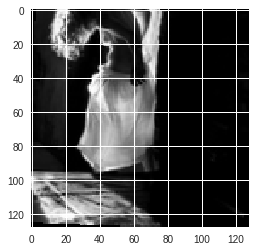

In [53]:
plot_image(image_loader.__getitem__(6)[0])
image_loader.__getitem__(6)[0]

In [0]:
# to get the tensor associated to the image
image_loader.__getitem__(19998)[0][0][20]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.2588, 0.2392, 0.2078, 0.2902, 0.0902, 0.0196, 0.0157,
        0.0118, 0.1490, 0.2706, 0.2667, 0.2392, 0.2784, 0.3725, 0.2980, 0.2235,
        0.2314, 0.3569, 0.3765, 0.2039, 0.2275, 0.2745, 0.3216, 0.3255, 0.3569,
        0.3686, 0.3412, 0.2745, 0.2667, 0.2941, 0.2980, 0.2588, 0.2118, 0.2431,
        0.3294, 0.5373, 0.6745, 0.6863, 0.6980, 0.5922, 0.4510, 0.4627, 0.4510,
        0.4588, 0.4588, 0.4706, 0.4863, 0.4980, 0.4980, 0.4902, 0.4824, 0.4745,
        0.4706, 0.4627, 0.4549, 0.4314, 0.3843, 0.4784, 0.5569, 0.5608, 0.5373,
        0.4863, 0.4863, 0.5333, 0.4941, 0.4588, 0.4941, 0.4980, 0.4627, 0.4706,
        0.5059, 0.4392, 0.4392, 0.4980, 0.5137, 0.5529, 0.5216, 0.3922, 0.2510,
        0.2275, 0.2078, 0.1922, 0.1961, 0.2353, 0.2824, 0.3176, 0.3098, 0.2627,
        0.1922, 0.1451, 0.2000, 0.2471, 0.2314, 0.2549, 0.2667, 0.3137, 0.3333,
        0.3373, 0.3020, 0.4667, 0.5647, 

In [0]:
#to get the lable asscoated to the image
image_loader.__getitem__(19998)[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.])